# Fashion MNIST Image Classification using ANN

TensorFlow tutorial: https://www.tensorflow.org/tutorials/keras/classification

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name()) # check GPU device name

2.9.2
/device:GPU:0


## Load Dataset

- Fashion MNIST dataset can be retrieved from TensorFlow's `tf.keras.datasets` API: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data 

- This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

- The classes are:

| Label | Description |
| -- | -- |
| 0 |	T-shirt/top |
| 1 |	Trouser |
| 2 |	Pullover |
| 3 |	Dress |
| 4 |	Coat |
| 5 |	Sandal |
| 6 |	Shirt |
| 7 |	Sneaker |
| 8 |	Bag |
| 9 |	Ankle boot |

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Data Exploration

In [4]:
# see the shapes of the numpy arrays
print(type(x_train), type(y_train), type(x_test), type(y_test))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# see an individual sample
print(y_train[100], class_names[y_train[100]])
print(x_train[100])

8 Bag
[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117
    0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167
  159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0
  174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0
    0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2
    0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2
    0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0
    4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0   0   1 

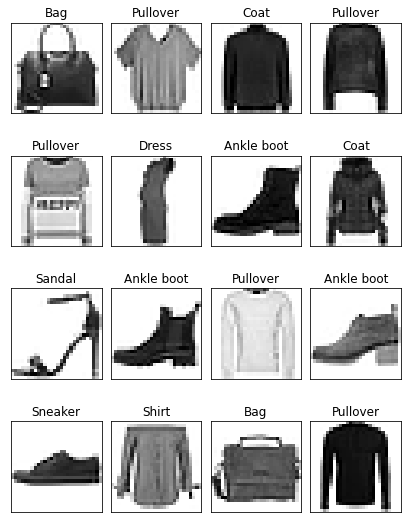

In [6]:
import random

fig = plt.figure(figsize = (7, 7))

# plot a sample of the dataset - 16 images, in a 4*4 matrix (subplots)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    rand_ind = random.randint(0, x_train.shape[0])
    plt.imshow(x_train[rand_ind], cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[y_train[rand_ind]])

# for space between subplots
plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.4, wspace = 0.1)

plt.show()

## Data Preprocessing

Scaling pixel intensity values:

In [7]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0
print(x_train_scaled.min(), x_train_scaled.max())
print(x_test_scaled.min(), x_test_scaled.max())

0.0 1.0
0.0 1.0


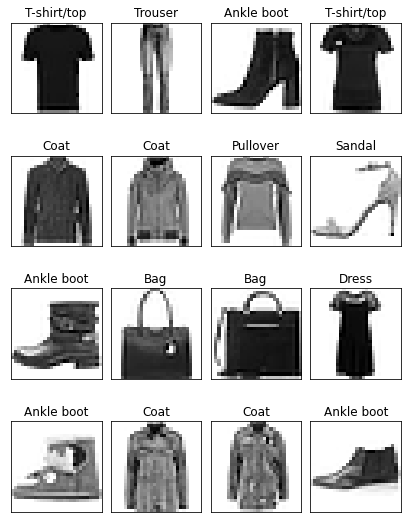

In [8]:
# plotting a sample of the dataset (verification that data is right)
fig = plt.figure(figsize = (7, 7))

# plot a sample of the dataset - 16 images, in a 4*4 matrix (subplots)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    rand_ind = random.randint(0, x_train_scaled.shape[0])
    plt.imshow(x_train_scaled[rand_ind], cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[y_train[rand_ind]])

# for space between subplots
plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.4, wspace = 0.1)

plt.show()

In [9]:
# define a data preprocessing function

def preprocess_data(x):
    x_scaled = x / 255.0
    return x_scaled

In [10]:
x_train_scaled, x_test_scaled = preprocess_data(x_train), preprocess_data(x_test)

In [11]:
print(x_train_scaled.shape)

(60000, 28, 28)


## Building a simple ANN model

- For image classification using ANN (not CNN), pixel intensity matrix must be a 1D array &rarr; Flatten it before giving to the ANN layers.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = x_train_scaled[0].shape),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 10) # len(class_names)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [14]:
# train the model
model.fit(x_train_scaled, y_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4937 - accuracy: 0.8236
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3678 - accuracy: 0.8663
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3300 - accuracy: 0.8779
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3096 - accuracy: 0.8864
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2782 - accuracy: 0.8953
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9005
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2547 - accuracy: 0.9044
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2476 - accuracy: 0.9075
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.236

## Making Predictions, Analysing the model's performance

In [15]:
# compute accuracy
acc = model.evaluate(x_test_scaled, y_test)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8826
[0.3494994342327118, 0.8826000094413757]


In [16]:
# make predictions
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

probability_pred = probability_model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [17]:
print(probability_pred[0])
print(np.argmax(probability_pred[0]))
print(y_test[0])
print(class_names[np.argmax(probability_pred[0])])

[4.9305396e-07 1.7840765e-06 4.7483947e-08 2.6949282e-08 1.1672731e-06
 8.0001309e-06 3.6883165e-09 1.3513941e-02 1.8945265e-10 9.8647457e-01]
9
9
Ankle boot


In [18]:
y_pred_proba = probability_model.predict(x_test_scaled)
y_pred = []
for y_pred_proba_i in y_pred_proba:
    y_pred.append(np.argmax(y_pred_proba_i))

313/313 [==============================] - 0s 2ms/step


In [19]:
# print confusion matrix
cf_matrix = tf.math.confusion_matrix(y_test, y_pred)
print(cf_matrix)

tf.Tensor(
[[824   1  14  22   6   1 126   0   6   0]
 [  3 968   3  20   4   0   1   0   1   0]
 [ 11   0 717   9 160   0 102   0   1   0]
 [ 29   9  12 864  55   0  26   0   5   0]
 [  1   0  54  17 883   0  42   0   3   0]
 [  0   0   0   0   0 975   0  17   1   7]
 [111   0  55  24  90   0 708   0  12   0]
 [  0   0   0   0   0  12   0 978   0  10]
 [  3   0   2   2   3   4   7   2 977   0]
 [  0   0   0   0   0   7   1  60   0 932]], shape=(10, 10), dtype=int32)


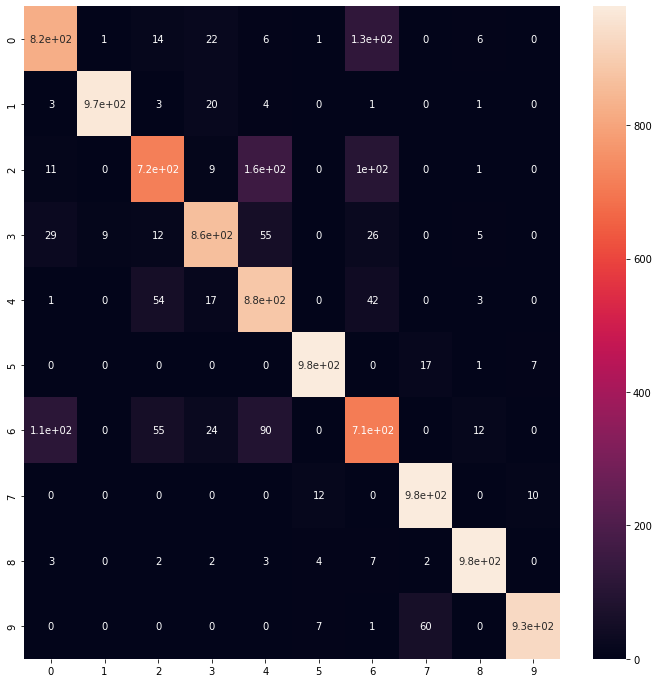

In [20]:
# better visualization of confusion matrix
import seaborn as sns

_ = plt.figure(figsize = (12, 12))
sns.heatmap(cf_matrix, annot = True)

In [21]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.72      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.74      0.88      0.80      1000
           5       0.98      0.97      0.98      1000
           6       0.70      0.71      0.70      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [22]:
# making prediction for a new unseen image (not in dataset)
from PIL import Image
import requests

# url = 'https://contents.mediadecathlon.com/p1484240/ab565f3675dbdd7e3c486175e2c16583/p1484240.jpg'
url_bag = 'https://assets.ajio.com/medias/sys_master/root/20220920/QgSo/6328f456f997dd1f8d0ad715/-288Wx360H-465016160-green-MODEL.jpg'
im_bag = Image.open(requests.get(url_bag, stream = True).raw)
new_size_bag = x_train[0].shape
im_smaller_bag = im_bag.resize(new_size_bag)
im_smaller_bag

In [23]:
url_ankle_boot = 'https://m.media-amazon.com/images/I/61PmGyP9VYL._UY625_.jpg'
im_ankle_boot = Image.open(requests.get(url_ankle_boot, stream = True).raw)
new_size_ankle_boot = x_train[0].shape
im_smaller_ankle_boot = im_ankle_boot.resize(new_size_ankle_boot)
im_smaller_ankle_boot

In [24]:
print(im_smaller_bag.format, im_smaller_bag.size, im_smaller_bag.mode)
print(im_smaller_ankle_boot.format, im_smaller_ankle_boot.size, im_smaller_ankle_boot.mode)

None (28, 28) RGB
None (28, 28) RGB


(28, 28)


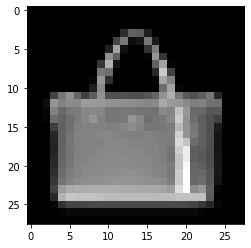

In [25]:
# https://stackoverflow.com/questions/14365029/numpy-3d-image-array-to-2d
img_2d_bag = np.asarray(im_smaller_bag)[:, :, 0]
img_2d_ankle_boot = np.asarray(im_smaller_ankle_boot)[:, :, 0]
print(img_2d_bag.shape)
plt.imshow(img_2d_bag, cmap = 'binary')

In [26]:
x_new = np.array([
    img_2d_bag,
    img_2d_ankle_boot
])

x_new_scaled = preprocess_data(x_new)
print(x_new_scaled.shape)

(2, 28, 28)


In [27]:
y_new_proba = probability_model.predict(x_new_scaled)

1/1 [==============================] - 0s 18ms/step


In [28]:
pred_bag = class_names[np.argmax(y_new_proba[0])]
pred_ankle_boot = class_names[np.argmax(y_new_proba[1])]
print(pred_bag, pred_ankle_boot)

Bag Bag


In [29]:
print(y_new_proba[0])
print(y_new_proba[1])

[4.1501964e-17 6.0072511e-18 2.3067206e-15 2.6857487e-25 2.0518177e-17
 0.0000000e+00 3.7690608e-08 1.2855394e-38 1.0000000e+00 8.8886602e-30]
[1.3988079e-16 7.2197264e-17 2.6025839e-15 8.1334851e-22 2.6453719e-17
 2.9393817e-34 9.5281283e-10 1.0519185e-33 1.0000000e+00 6.9272187e-24]
